<a href="https://colab.research.google.com/github/bojiix/RAM-OSI-BAN-AI/blob/master/SDP_team_project_Group9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports And Read Data**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os
import random

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/bojiix/RAM-OSI-BAN-AI/bojan/cardio_train.csv", sep=";") # citirea bazei de date; separarea in functie de ;

**First - Analyze Data**

https://www.kaggle.com/sulianova/eda-cardiovascular-data

The source offers a dataset of 70k entries and described all of the data as being of 3 types:
  - objective: factual information;
  - examination: results of medical examination;
  - subjective: information given by the patient.

Firstly, we'll take a look at every data's type and limits. We have:

Age(Objective) - measured in days(int)

Height(Objective) - measured in cm(int)

Weight(Objective) - measured in kg(float)

Gender(Objective) - categorical(1 - female, 2 - male)

---

Systolic blood pressure(Examination) - measured in mmHg(int)

Diastolic blood pressure(Examination) -	measured in mmHg(int)

Cholesterol(Examination) - has 3 numerical represented stages:	1 - normal, 2 - above normal, 3 - well above normal

Glucose(Examination) - has also 3 numerical represented stages: 1 - normal, 2 - above normal, 3 - well above normal

---

Smoking(Subjective)	- binary: 0 - no, 1 - yes

Alcohol intake(Subjective) - binary: 0 - no, 1 - yes

Physical activity(Subjective) - binary: 0 - no, 1 - yes

---

Presence or absence of cardiovascular disease(the target aspect) - binary: 0 - ok, 1 - not ok

---

All of this data will be arranged as columns:

Age - age

Height - height

Weight - weight

Gender - gender

Systolic blood pressure - sbp

Diastolic blood pressure - dbp

Cholesterol - cholesterol

Glucose - glucose

Smoking - smoking

Alcohol intake - alcohol

Physical activity - physical_active

Presence or absence of cardiovascular disease - cardio_issues

We also added another column called 'years' that also represents the age of the subject.

In [3]:
df['years'] = (df['age'] / 365).round().astype('int') # added age in years
df #preview data

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [5]:
df.info() # informatiile dataframe-ului, tip coloane, coloane non-null, nume coloane 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               70000 non-null  int64  
 1   age              70000 non-null  int64  
 2   gender           70000 non-null  int64  
 3   height           70000 non-null  int64  
 4   weight           70000 non-null  float64
 5   sbp              70000 non-null  int64  
 6   dbp              70000 non-null  int64  
 7   cholesterol      70000 non-null  int64  
 8   glucose          70000 non-null  int64  
 9   smoking          70000 non-null  int64  
 10  alcohol          70000 non-null  int64  
 11  physical_active  70000 non-null  int64  
 12  cardio_issues    70000 non-null  int64  
 13  years            70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [6]:
df.describe() # calculeaza count, mean, ... max pentru toate datele

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [7]:
limits = {
  "age": [6570, 54750],
  "gender": [1, 2],
  "height": [120, 250],
  "weight": [35, 200],
  "sbp": [75, 200],
  "dbp": [50, 150],
  "cholesterol": [1, 3],
  "glucose": [1, 3],
  "smoking": [0, 1],
  "alcohol": [0, 1],
  "physical_active": [0, 1],
  "cardio_issues": [0, 1],
  "years": [18, 110]
}

In [8]:
def checkIfIsOutOfLimits(data):
  for key, value in limits.items():
    print("Instances where {0} is greater or lesser than the chosen limits: Greater: {1}, Lesser {2}".format(key, data[data[key] > value[1]].shape[0], data[data[key] < value[0]].shape[0]))

In [9]:
def checkDSP(data, bpmelt):
  sns.boxplot(x = 'variable',y = 'value',data = bpmelt)
  print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['dbp']> data['sbp']].shape[0]))

In [10]:
checkIfIsOutOfLimits(df)

Instances where age is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where gender is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where height is greater or lesser than the chosen limits: Greater: 0, Lesser 52
Instances where weight is greater or lesser than the chosen limits: Greater: 0, Lesser 20
Instances where sbp is greater or lesser than the chosen limits: Greater: 100, Lesser 207
Instances where dbp is greater or lesser than the chosen limits: Greater: 975, Lesser 80
Instances where cholesterol is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where glucose is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where smoking is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where alcohol is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where physical_active is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Inst

In [11]:
blood_pressure = df.loc[:,['dbp','sbp']]
blood_pressure

,dbp,sbp
0,80,110
1,90,140
2,70,130
3,100,150
4,60,100
...,...,...
69995,80,120
69996,90,140
69997,90,180
69998,80,135


In [12]:
blood_pressureMelt = blood_pressure.melt()
blood_pressureMelt

,variable,value
0,dbp,80
1,dbp,90
2,dbp,70
3,dbp,100
4,dbp,60
...,...,...
139995,sbp,120
139996,sbp,140
139997,sbp,180
139998,sbp,135


Diastilic pressure is higher than systolic one in 1234 cases


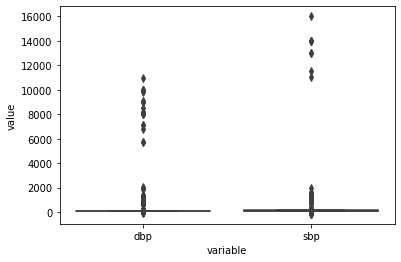

In [13]:
checkDSP(df, blood_pressureMelt)

In [14]:
cleandf = df.copy()
cleandf

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


Optional - Create Fake Data

In [15]:
def generateArray(cond, num, lims, d_var):
  arr = []

  if isinstance(d_var, np.int64) or isinstance(d_var, int):
    if cond == True:
      arr = np.random.randint(lims[0], lims[1] + 1, size=num)
    else:
      arr = np.random.randint(lims[1] + 2, 100000, size=num)
  else:
    if isinstance(d_var, np.float64) or isinstance(d_var, float):
      if cond == True:
        arr = np.random.uniform(lims[0], lims[1] + 1, size=num)
      else:
        arr = np.random.uniform(lims[1] + 2, 100000, size=num)

        for i in range(len(arr)):
          arr[i] = float('NaN') if random.choice([True, False]) == True else arr[i]

  return arr

In [16]:
def createData(assign_vec, num, aux):
  obj = {
      "id": aux.tail(1)['id'] + 1,
      "age": generateArray(assign_vec[1], num, limits["age"], aux['age'][0]),
      "gender": generateArray(assign_vec[2], num, limits["gender"], aux['gender'][0]),
      "height": generateArray(assign_vec[3], num, limits["height"], aux['height'][0]),
      "weight": generateArray(assign_vec[4], num, limits["weight"], aux['weight'][0]),
      "sbp": generateArray(assign_vec[5], num, limits["sbp"], aux['sbp'][0]),
      "dbp": generateArray(assign_vec[6], num, limits["dbp"], aux['dbp'][0]),
      "cholesterol": generateArray(assign_vec[7], num, limits["cholesterol"], aux['cholesterol'][0]),
      "glucose": generateArray(assign_vec[8], num, limits["glucose"], aux['glucose'][0]),
      "smoking": generateArray(assign_vec[9], num, limits["smoking"], aux['smoking'][0]),
      "alcohol": generateArray(assign_vec[10], num, limits["alcohol"], aux['alcohol'][0]),
      "physical_active": generateArray(assign_vec[11], num, limits["physical_active"], aux['physical_active'][0]),
      "cardio_issues": generateArray(assign_vec[12], num, limits["cardio_issues"], aux['cardio_issues'][0]),
      "years": generateArray(assign_vec[13], num, limits["years"], aux['years'][0]),
  }
  to_adddf = pd.DataFrame(obj)
  return to_adddf

In [17]:
def generateData(aux, n):
  for i in range(n):
    arr = np.random.choice([True, False], size=len(aux.columns))
    aux = aux.append(createData(arr, 1, aux), ignore_index=True)  
  return aux

In [18]:
cleandf_fd = cleandf.head(10).copy()
cleandf_fd

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,61
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,62
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54


In [19]:
cleandf_fd = generateData(cleandf_fd, 3)
cleandf_fd

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0,48
5,8,21914,1,151,67.000000,120,80,2,2,0,0,0,0,60
6,9,22113,1,157,93.000000,130,80,3,1,0,0,1,0,61
7,12,22584,2,178,95.000000,130,90,3,3,0,0,1,1,62
8,13,17668,1,158,71.000000,110,70,1,1,0,0,1,0,48
9,14,19834,1,164,68.000000,110,60,1,1,0,0,0,0,54


**Second - Clean Data**

In [20]:
def clearErrorsFromMyData(data):
  for key, value in limits.items():
    data.drop(data[(data[key] > value[1]) | (data[key] < value[0])].index,inplace=True)
  data.drop(data[(data['sbp'] < 0) | (data['dbp'] < 0) | (data['sbp'] < data['dbp'])].index,inplace=True)
  return data

In [21]:
data = cleandf.copy()
print("Before\n {0}".format(data))
data = clearErrorsFromMyData(data)
print("After\n {0}".format(data))

Before
           id    age  gender  ...  physical_active  cardio_issues  years
0          0  18393       2  ...                1              0     50
1          1  20228       1  ...                1              1     55
2          2  18857       1  ...                0              1     52
3          3  17623       2  ...                1              1     48
4          4  17474       1  ...                0              0     48
...      ...    ...     ...  ...              ...            ...    ...
69995  99993  19240       2  ...                1              0     53
69996  99995  22601       1  ...                1              1     62
69997  99996  19066       2  ...                0              1     52
69998  99998  22431       1  ...                0              1     61
69999  99999  20540       1  ...                1              0     56

[70000 rows x 14 columns]
After
           id    age  gender  ...  physical_active  cardio_issues  years
0          0  18393   

In [22]:
checkIfIsOutOfLimits(data)

Instances where age is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where gender is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where height is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where weight is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where sbp is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where dbp is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where cholesterol is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where glucose is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where smoking is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where alcohol is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where physical_active is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances whe

Diastilic pressure is higher than systolic one in 0 cases


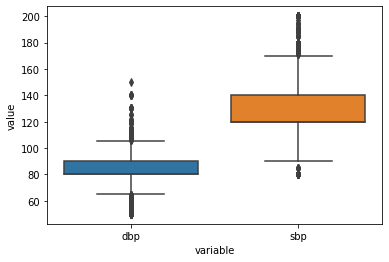

In [23]:
blood_pressure = data.loc[:,['dbp','sbp']]
blood_pressureMelt = blood_pressure.melt()

checkDSP(data, blood_pressureMelt)

In [24]:
data.describe()

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
count,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000
mean,49974.953538,19464.262969,1.348568,164.417283,74.116069,126.606794,81.289834,1.364459,1.225642,0.087963,0.053335,0.803324,0.494491,53.326344
std,28848.043430,2468.238892,0.476520,7.914021,14.279412,16.486574,9.344670,0.678796,0.571549,0.283243,0.224702,0.397488,0.499973,6.768013
min,0.000000,10798.000000,1.000000,120.000000,35.000000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25003.000000,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50012.000000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74877.000000,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,200.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


# RA

Numarul total de persoane, separate dupa gen.

---

In [ ]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

  Pentru a afla daca valoarea 1 din coloana 'gender' reprezinta genul feminin sau masculin vom calcula inaltimea medie a celor doua genuri. De asemenea, vom tine cont de presupunerea ca, in medie, inaltimea barbatilor este mai mare decat cea a femeilor.

In [ ]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Am extras submultimea formata din coloanele 'gender' si 'height', unde 'gender' are rol de index si 'height' este valoarea acesteia. Pentru a obtine valoarea medie a inaltimii, am aplicat functia mean() asupra submultimii obtinute.                                  
Din rezultatul obtinut si tinand cont de presupunerea mentionata anterior, putem presupune ca valoarea 1 din coloana 'gender' reprezinta genul feminin, deoarece valoarea media a acesteia este mai mica decat cea a valorii 2.

Diferite statistici in functie de gen

---

In [ ]:
gender_stats = df.groupby('gender')['alco','smoke','gluc','cholesterol']
gender_stats.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,alco,smoke,gluc,cholesterol
gender,,,,
1,0.025500,0.017856,1.235054,1.384735
2,0.106375,0.218880,1.210462,1.333633


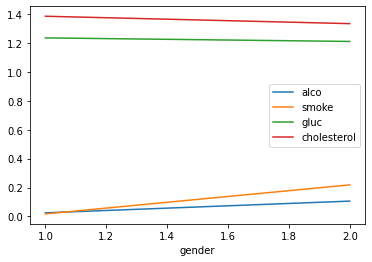

In [ ]:
gender_stats.mean().plot()

In [ ]:
gender_stats.filter(lambda x: x['alco'].mean() > x['smoke'].mean())

,alco,smoke,gluc,cholesterol
1,0,0,1,3
2,0,0,1,3
4,0,0,1,1
5,0,0,2,2
6,0,0,1,3
...,...,...,...,...
69993,0,0,1,1
69994,0,0,1,1
69996,0,0,2,2
69998,0,0,2,1


In [ ]:
gender_stats.agg({'alco': 'std', 'smoke': 'std','gluc':'std','cholesterol':'std'})

,alco,smoke,gluc,cholesterol
gender,,,,
1,0.157639,0.132431,0.582956,0.693417
2,0.308323,0.413496,0.551493,0.653764



Persoane cu boli cardiace, pe grupe de varsta

---



In [ ]:
df.groupby('gender')['age'].min()/365

gender
1    29.750685
2    29.583562
Name: age, dtype: float64

In [ ]:
df.groupby('gender')['age'].max()/365

gender
1    64.934247
2    64.967123
Name: age, dtype: float64

Deoarece am grupat coloana 'age' dupa gen, am aflat valoarea minima si maxima de varsta. Folosind aceasta informatie, am stabilit ca valoare coloanei 'age' va fi cuprinsa intre 29 si 64 de ani.

In [ ]:
def age_func(x):
  if (x < 30.0) & (x >= 20.0):
    return '20s'
  elif (x < 40.0) & (x >= 30.0):
    return '30s'
  elif (x < 50.0) & (x >= 40.0):
    return '40s'
  elif (x < 60.0) & (x >= 50.0):
    return '50s'
  elif (x < 70.0) & (x >= 60.0):
    return '60s'


Am definit functia age_func(), care va ajuta la stabilirea categoriei de varsta. Categoriile de varsta sunt: 
* 20s (varsta cuprinsa intre 20 -> 29 de ani)
* 30s (varsta cuprinsa intre 30 -> 39 de ani)
* 40s (varsta cuprinsa intre 40 -> 49 de ani)
* 50s (varsta cuprinsa intre 50 -> 59 de ani)
* 60s (varsta cuprinsa intre 60 -> 69 de ani)

In [ ]:
ages = [] 
#print(len(ages))
for i, j in df['age'].iteritems():
    ages.append(age_func(df['age'][i]/365))
#print(ages)
df['age_cat']=ages

In lista ages am salvat categoriile de varsta pentru fiecare intrare din coloana 'age', dupa care am atribuit valorile din lista noii coloane 'age_cat'.

In [ ]:
tb1 = df.pivot_table(values='id',index='age_cat',columns='cardio', aggfunc=len, fill_value=0)
tb1

cardio,0,1
age_cat,,
20s,3,0
30s,1349,432
40s,12177,7448
50s,17186,18355
60s,4306,8744


Prin folosirea functiei pivot_table, am creat tabelul pivot ce evidentiaza numarul de persoane cardiace pe grupe de varsta. 

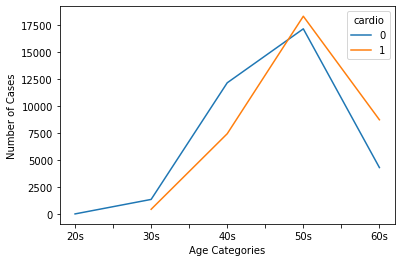

In [ ]:
tb1.plot(xlabel="Age Categories", ylabel="Number of Cases")

Persoane cu tensiunea normala, pe categorii de varsta

---

In [ ]:
#df[(df.v3 == some_value) & (df.v4 == some_value)].pivot_table(index='v1', columns='A', values='v3', aggfunc='count')
tb2 = df[((df.ap_hi >= 120) & (df.ap_hi <= 121) & (df.ap_lo >= 79) & (df.ap_lo <= 80) & (df['age_cat'] == '20s')) |
   ((df.ap_hi >= 122) & (df.ap_hi <= 123) & (df.ap_lo >= 81) & (df.ap_lo <= 82) & (df['age_cat'] == '30s')) |
   ((df.ap_hi >= 124) & (df.ap_hi <= 127) & (df.ap_lo >= 83) & (df.ap_lo <= 84) & (df['age_cat'] == '40s')) |
   ((df.ap_hi >= 128) & (df.ap_hi <= 131) & (df.ap_lo >= 85) & (df.ap_lo <= 86) & (df['age_cat'] == '50s')) |
   ((df.ap_hi >= 132) & (df.ap_hi <= 134) & (df.ap_lo >= 87) & (df.ap_lo <= 88) & (df['age_cat'] == '60s'))
   ].pivot_table(values=['ap_hi',	'ap_lo',	'alco','smoke','gluc','cholesterol','active','cardio'],index='age_cat', aggfunc='mean') 
tb2


,active,alco,ap_hi,ap_lo,cardio,cholesterol,gluc,smoke
age_cat,,,,,,,,
20s,1.00,0.00,120.00,80.00,0.00,1.00,1.00,0.00
40s,0.75,0.00,125.50,83.50,0.00,1.00,1.00,0.00
50s,0.86,0.12,129.94,85.06,0.62,1.58,1.36,0.08
